In [8]:
#%load_ext autoreload
#%autoreload 2

In [1]:
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_poissonVI_embedding.h5ad")

In [4]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

In [5]:
endocrine_celltypes = [
    "Ductal",
    "Prlf. Ductal",
    "Ngn3 low",
    "Ngn3 high",
    "Ngn3 high cycling",
    "Fev+",
    "Fev+ Alpha",
    "Fev+ Beta",
    "Fev+ Delta",
    "Eps/Delta progenitors",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
]

In [6]:
adata_red = adata[adata.obs["celltype"].isin(endocrine_celltypes)]

In [7]:
adata = adata_red.copy()

In [8]:
adata

AnnData object with n_obs × n_vars = 13668 × 198535
    obs: 'old_index', 'celltype', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'sample', 'batch', '_scvi_batch', '_scvi_labels', 'time'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_poiss_vi', 'X_umap', 'X_umap_ATAC', 'X_umap_GEX', 'lsi_full', 'lsi_red', 'lsi_red2'
    layers: 'ATAC_counts'
    obsp: 'connectivities', 'distances'

# PCA of GEX space

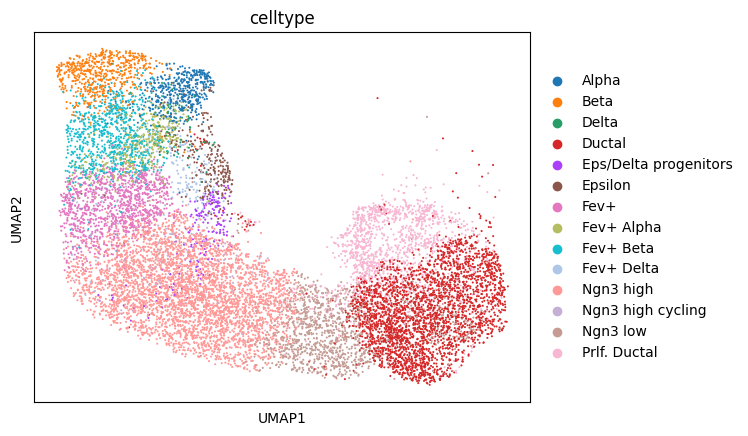

In [9]:
sc.pl.umap(adata, color="celltype")

In [10]:
tp0 = TemporalProblem(adata)
tp0 = tp0.prepare("time", joint_attr="lsi_red")

In [11]:
tp0 = tp0.solve(epsilon=1e-2, scale_cost="mean", max_iterations=1e4)

In [12]:
tp0[14.5, 15.5].solution.converged

True

In [13]:
tp0.pull(14.5, 15.5, data="celltype", subset="Delta")

In [14]:
adata.obs["pull"].sum()

1.9999999946489844

In [15]:
import moscot.plotting as mpl

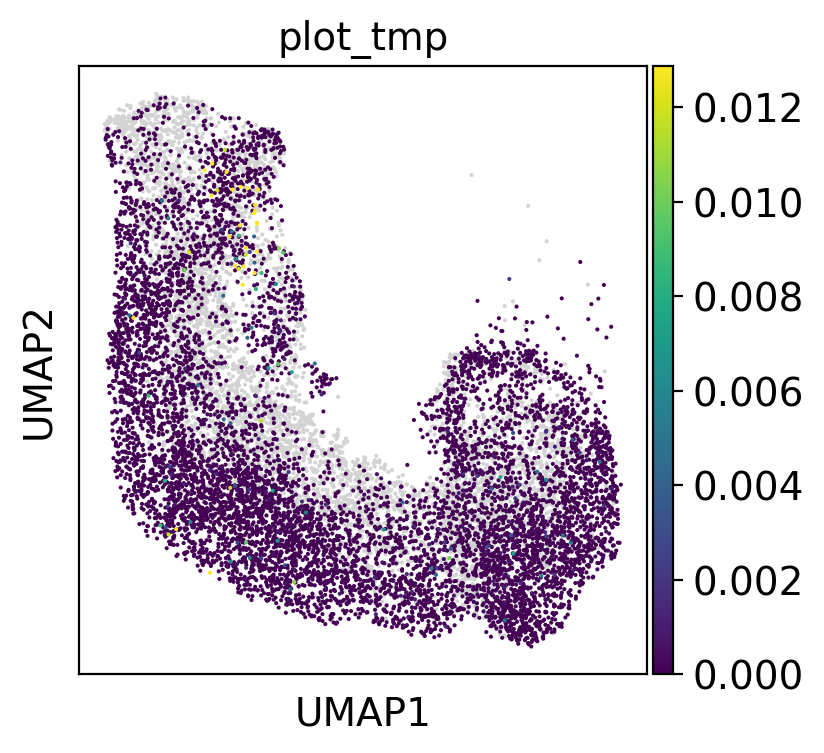

In [16]:
mpl.pull(tp0, time_points=[14.5])

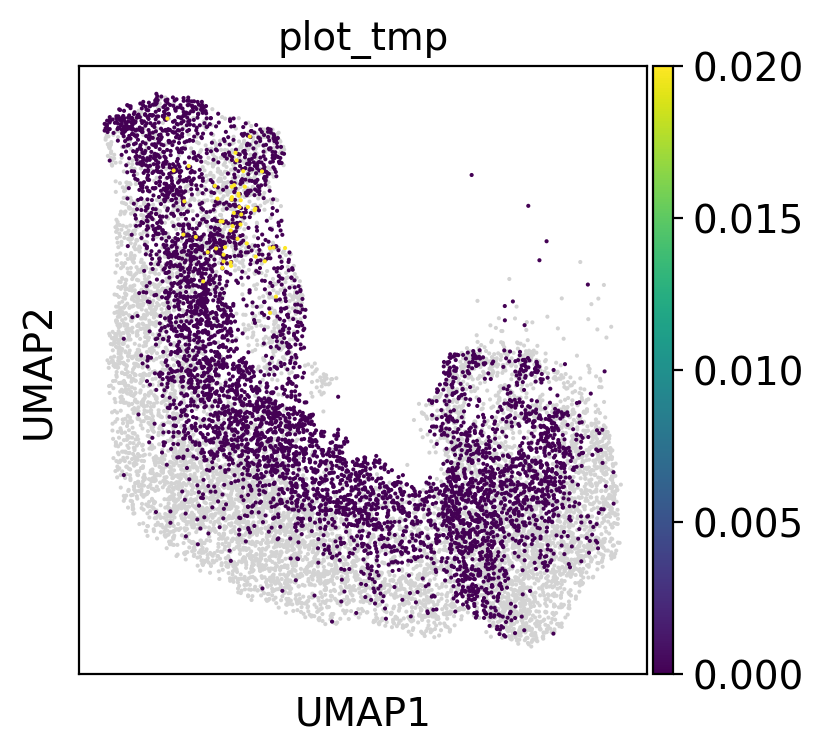

In [17]:
mpl.pull(tp0, time_points=[15.5])

In [18]:
adata.obs.to_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/delta_pull_ATAC.csv")